In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/WHO-COVID-19-global-data.csv


# Task 1

## WHO Covid-19 dataset

This dataset provided by WHO describes the number of deaths, cumulative deaths, confirmed cases, and cumulative confirmed cases per Country and per day. This dataset was downloaded from [WHO](https://covid19.who.int/) and uploaded to Kaggle notebook. <br>
To load data set *pd.read_csv()* is used.

In [2]:
df = pd.read_csv('/kaggle/input/WHO-COVID-19-global-data.csv')
df.head(10)

,day,Country,Country Name,Region,Deaths,Cumulative Deaths,Confirmed,Cumulative Confirmed
0,2020-02-24,AF,Afghanistan,EMRO,0,0,1,1
1,2020-02-25,AF,Afghanistan,EMRO,0,0,0,1
2,2020-02-26,AF,Afghanistan,EMRO,0,0,0,1
3,2020-02-27,AF,Afghanistan,EMRO,0,0,0,1
4,2020-02-28,AF,Afghanistan,EMRO,0,0,0,1
5,2020-02-29,AF,Afghanistan,EMRO,0,0,0,1
6,2020-03-01,AF,Afghanistan,EMRO,0,0,0,1
7,2020-03-02,AF,Afghanistan,EMRO,0,0,0,1
8,2020-03-03,AF,Afghanistan,EMRO,0,0,0,1
9,2020-03-04,AF,Afghanistan,EMRO,0,0,0,1


## Dimension of the data (rows, columns)

In [3]:
print(df.shape)

(11172, 8)


## Date range of the data

In [4]:
df_range = df.sort_values(by=['day'])
print(df_range['day'].unique())

['2020-01-08' '2020-01-09' '2020-01-10' '2020-01-11' '2020-01-12'
 '2020-01-13' '2020-01-14' '2020-01-15' '2020-01-16' '2020-01-17'
 '2020-01-18' '2020-01-19' '2020-01-20' '2020-01-21' '2020-01-22'
 '2020-01-23' '2020-01-24' '2020-01-25' '2020-01-26' '2020-01-27'
 '2020-01-28' '2020-01-29' '2020-01-30' '2020-01-31' '2020-02-01'
 '2020-02-02' '2020-02-03' '2020-02-04' '2020-02-05' '2020-02-06'
 '2020-02-07' '2020-02-08' '2020-02-09' '2020-02-10' '2020-02-11'
 '2020-02-12' '2020-02-13' '2020-02-14' '2020-02-15' '2020-02-16'
 '2020-02-17' '2020-02-18' '2020-02-19' '2020-02-20' '2020-02-21'
 '2020-02-22' '2020-02-23' '2020-02-24' '2020-02-25' '2020-02-26'
 '2020-02-27' '2020-02-28' '2020-02-29' '2020-03-01' '2020-03-02'
 '2020-03-03' '2020-03-04' '2020-03-05' '2020-03-06' '2020-03-07'
 '2020-03-08' '2020-03-09' '2020-03-10' '2020-03-11' '2020-03-12'
 '2020-03-13' '2020-03-14' '2020-03-15' '2020-03-16' '2020-03-17'
 '2020-03-18' '2020-03-19' '2020-03-20' '2020-03-21' '2020-03-22'
 '2020-03-

The date range is from 2020-01-08 to 2020-04-26

# Task 2

## Number of countries in the dataset

In [5]:
print(df['Country Name'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bonaire, Sint Eustatius and Saba'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Congo'
 'Costa Rica' 'Côte d’Ivoire' 'Croatia' 'Cuba' 'Curacao' 'Cyprus'
 'Czechia' 'Democratic Republic of the Congo' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia'
 'Falkland Islands (Malvinas)' 'Faroe Islands' 'Fiji' 'Finland' 'France'
 'French Guiana' 'French Polynesia' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana

In [6]:
print('Number of Countries: ',len(df['Country'].unique()))

Number of Countries:  212


## First country to report confirmed case (according to data)

In [7]:
df.sort_values(by=['day'])

,day,Country,Country Name,Region,Deaths,Cumulative Deaths,Confirmed,Cumulative Confirmed
10021,2020-01-08,TH,Thailand,SEARO,0,0,1,1
10022,2020-01-09,TH,Thailand,SEARO,0,0,0,1
10023,2020-01-10,TH,Thailand,SEARO,0,0,0,1
2082,2020-01-11,CN,China,WPRO,1,1,41,41
10024,2020-01-11,TH,Thailand,SEARO,0,0,0,1
...,...,...,...,...,...,...,...,...
5337,2020-04-26,JM,Jamaica,AMRO,0,7,31,288
5441,2020-04-26,JP,Japan,WPRO,14,348,353,13182
5487,2020-04-26,JE,Jersey,EURO,0,19,2,278
5096,2020-04-26,IE,Ireland,EURO,234,1063,377,18561


According to this data, the first case reported on Jan 08th 2020 was in Thailand. In actual, China was the first country with a confirmed case. By Jan 11th 2020, there were already 41 reported confirmed cases in China.

## Line chart showing growth of confirmed cases in China, Thailand, and USA.

In [8]:
df_china = df[df['Country Name'] == 'China']
df_china.head()

,day,Country,Country Name,Region,Deaths,Cumulative Deaths,Confirmed,Cumulative Confirmed
2082,2020-01-11,CN,China,WPRO,1,1,41,41
2083,2020-01-12,CN,China,WPRO,0,1,0,41
2084,2020-01-13,CN,China,WPRO,0,1,0,41
2085,2020-01-14,CN,China,WPRO,0,1,0,41
2086,2020-01-15,CN,China,WPRO,0,1,0,41


### Line chart for China

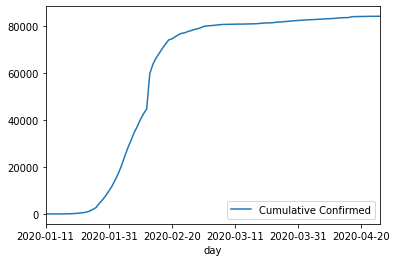

In [9]:
df_china.plot.line(x= 'day', y = 'Cumulative Confirmed')

In [10]:
df_thailand = df[df['Country Name'] == 'Thailand']
df_thailand.head()

,day,Country,Country Name,Region,Deaths,Cumulative Deaths,Confirmed,Cumulative Confirmed
10021,2020-01-08,TH,Thailand,SEARO,0,0,1,1
10022,2020-01-09,TH,Thailand,SEARO,0,0,0,1
10023,2020-01-10,TH,Thailand,SEARO,0,0,0,1
10024,2020-01-11,TH,Thailand,SEARO,0,0,0,1
10025,2020-01-12,TH,Thailand,SEARO,0,0,0,1


### Line chart for Thailand

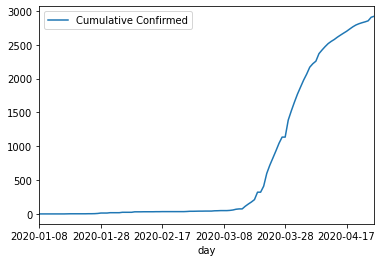

In [11]:
df_thailand.plot.line(x= 'day', y = 'Cumulative Confirmed')

In [12]:
df_usa = df[df['Country Name'] == 'United States of America']
df_usa.head()

,day,Country,Country Name,Region,Deaths,Cumulative Deaths,Confirmed,Cumulative Confirmed
10711,2020-01-20,US,United States of America,AMRO,0,0,1,1
10712,2020-01-21,US,United States of America,AMRO,0,0,0,1
10713,2020-01-22,US,United States of America,AMRO,0,0,0,1
10714,2020-01-23,US,United States of America,AMRO,0,0,0,1
10715,2020-01-24,US,United States of America,AMRO,0,0,1,2


### Line chart for USA

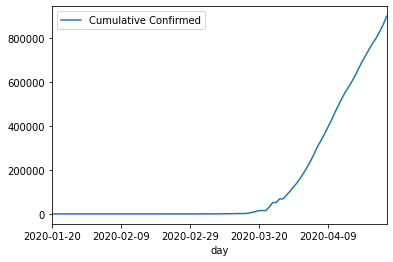

In [13]:
df_usa.plot.line(x= 'day', y = 'Cumulative Confirmed')

## Comparison of cumulative confirmed cases by Country

In [14]:
df2 = df.sort_values(by=['Country'])
df2.drop_duplicates(subset ="Country", 
                     keep = 'first', inplace = True) 
df2.head()

,day,Country,Country Name,Region,Deaths,Cumulative Deaths,Confirmed,Cumulative Confirmed
181,2020-03-09,AD,Andorra,EURO,0,0,0,1
10642,2020-03-30,AE,United Arab Emirates,EMRO,3,5,143,611
0,2020-02-24,AF,Afghanistan,EMRO,0,0,1,1
299,2020-03-13,AG,Antigua and Barbuda,AMRO,0,0,1,1
287,2020-04-15,AI,Anguilla,AMRO,0,0,0,3


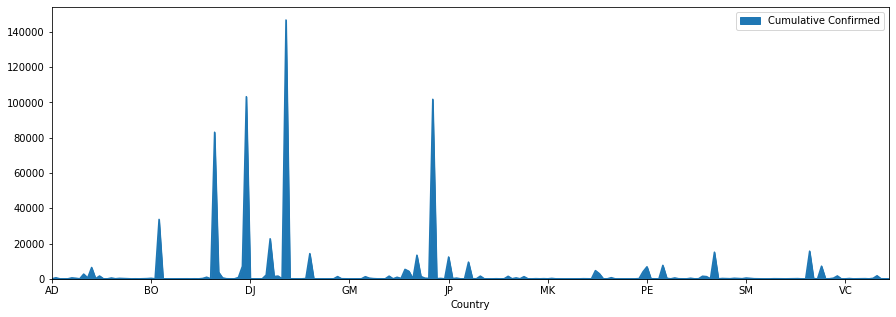

In [15]:
import matplotlib.pyplot as plt
df2.plot.area(y = 'Cumulative Confirmed', x='Country', figsize=(15,5))


# Task 3

## Predict confirmed cases by target country
For this task Linear Regression model is used. 

### Find minimum and maximum values for confirmed cases

In [16]:
min_con = df['Confirmed'].min()
min_con

0

In [17]:
max_con = df['Confirmed'].max()
max_con

38509

### Normalize the values to be between 0 and 1

In [18]:
def t_normalized(origin):
    if origin is None:
        return None
    else:
        return ((origin-min_con)/(max_con-min_con))

normalized_confirmed = t_normalized(df['Confirmed'])

### Find the min and max for cumulative confirmed cases

In [19]:
min_cumulative_con = df['Cumulative Confirmed'].min()
min_cumulative_con

1

In [20]:
max_cumulative_con = df['Cumulative Confirmed'].max()
max_cumulative_con

899281

### Normalize the values to be between 0 and 1

In [21]:
def t_normalized(origin):
    if origin is None:
        return None
    else:
        return ((origin-min_cumulative_con)/(max_cumulative_con-min_cumulative_con))

normalized_cumulative_confirmed = t_normalized(df['Cumulative Confirmed'])

### Reshape the values

In [22]:
y = normalized_confirmed.values.reshape(-1,1)
X = normalized_cumulative_confirmed.values.reshape(-1,1)

### Split into train and test sets

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Import the model and fit

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Perform prediction on the test set

In [25]:
y_pred = regressor.predict(X_test)

### The result. Actual vs Predicted

In [26]:
result_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
result_df

,Actual,Predicted
0,0.000000,0.000950
1,0.000052,0.001288
2,0.000000,0.001220
3,0.000000,0.000980
4,0.000415,0.001253
...,...,...
2230,0.000000,0.000936
2231,0.000000,0.000960
2232,0.000000,0.000936
2233,0.000000,0.000937


### Visual representation of Actual vs Predicted

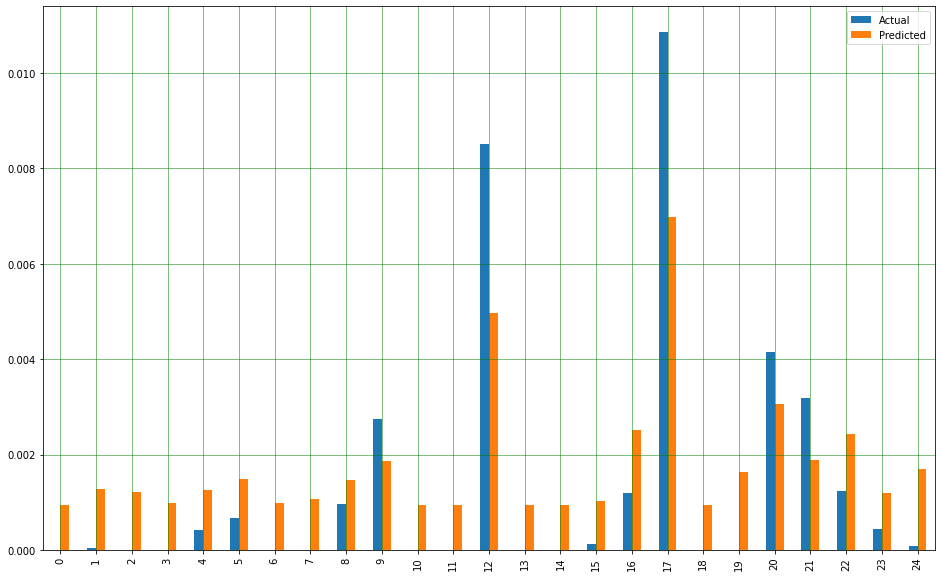

In [27]:
df1 = result_df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Perform prediction on a target country.

In [28]:
df_france = df[df['Country Name'] == 'France']

In [29]:
x_test = df_france['Confirmed'].values.reshape(-1,1)

In [30]:
y_pred = regressor.predict(x_test)

In [31]:
res_df = pd.DataFrame({'Actual': x_test.flatten(), 'Predicted': y_pred.flatten()})
res_df

,Actual,Predicted
0,3,3.009798
1,0,0.000936
2,0,0.000936
3,0,0.000936
4,1,1.003890
...,...,...
89,2638,2645.793366
90,1810,1815.347524
91,1622,1626.792188
92,1755,1760.185058


### Visual representation of Actual vs Predicted

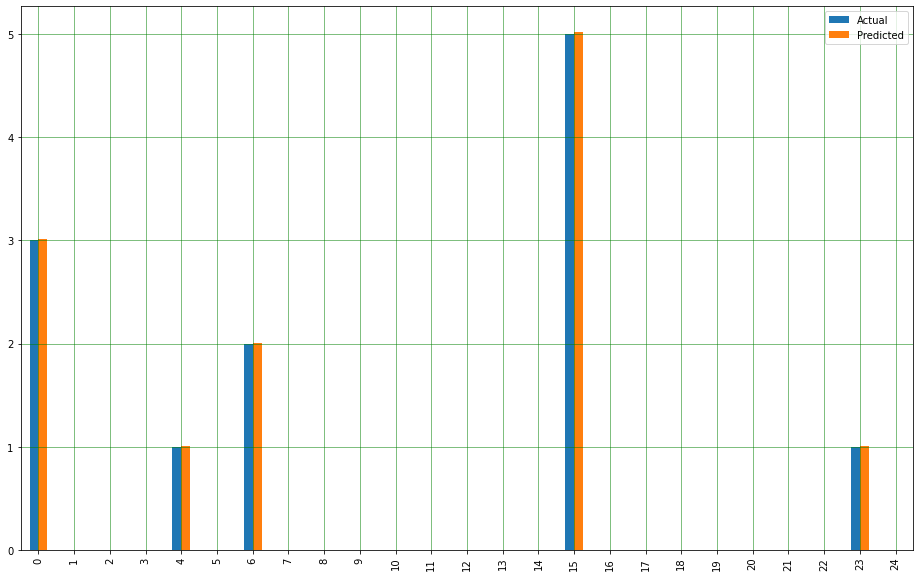

In [32]:
df1 = res_df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()